<a href="https://colab.research.google.com/github/cdiegor/Metaheuristicas/blob/main/PCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

O problema do caixeiro viajante (PCV ou TSP) faz a seguinte pergunta: "dada uma lista de cidades e as distâncias entre cada par de cidades, qual é a rota mais curta possível que visita cada cidade exatamente uma vez e retorna ao cidade de origem?" É um problema NP-difícil em otimização combinatória, importante em ciência da computação teórica e pesquisa operacional.

O problema do comprador viajante e o problema de roteamento de veículos são generalizações do PCV.

Na teoria da complexidade computacional, a versão de decisão do TSP (onde dado um comprimento L, a tarefa é decidir se o grafo tem um percurso de no máximo L) pertence à classe de problemas NP-completos. Assim, é possível que o tempo de execução do pior caso para qualquer algoritmo para o TSP aumente superpolinomialmente (mas não mais que exponencialmente) com o número de cidades.

O problema foi formulado pela primeira vez em 1930 e é um dos problemas mais intensamente estudados em otimização. Ele é usado como referência para muitos métodos de otimização. Embora o problema seja computacionalmente difícil, muitas heurísticas e algoritmos exatos são conhecidos, de modo que algumas instâncias com dezenas de milhares de cidades podem ser resolvidas completamente e mesmo problemas com milhões de cidades podem ser aproximados em uma pequena fração de 1% (o que dizer de um problema com todas as cidades do mundo? https://www.math.uwaterloo.ca/tsp/world/)

O PCV tem diversas aplicações mesmo em sua formulação mais pura, como planejamento, logística e fabricação de microchips. Ligeiramente modificado, aparece como um subproblema em muitas áreas, como no sequenciamento de DNA. Nessas aplicações, o conceito de cidade representa, por exemplo, clientes, pontos de solda ou fragmentos de DNA, e o conceito de distância representa tempo ou custo de viagem, ou uma medida de similaridade entre fragmentos de DNA. O PCV também aparece na astronomia, pois os astrônomos que observam muitas fontes desejam minimizar o tempo gasto movendo o telescópio entre as fontes; em tais problemas, o PCV pode ser inserido em um problema de controle ótimo. Em muitas aplicações, podem ser impostas restrições adicionais, como recursos limitados ou janelas de tempo.

Fonte: Wikipedia. *Travelling salesman problem*. Acessível em https://en.wikipedia.org/wiki/Travelling_salesman_problem

## Créditos

A maior parte dos códigos, ideias, figuras foram inspiradas ou obtidas de Jupyter at Bryn Mawr College, *The Traveling Salesperson Problem*. Acessível em https://jupyter.brynmawr.edu/services/public/dblank/jupyter.cs/FLAIRS-2015/TSPv3.ipynb

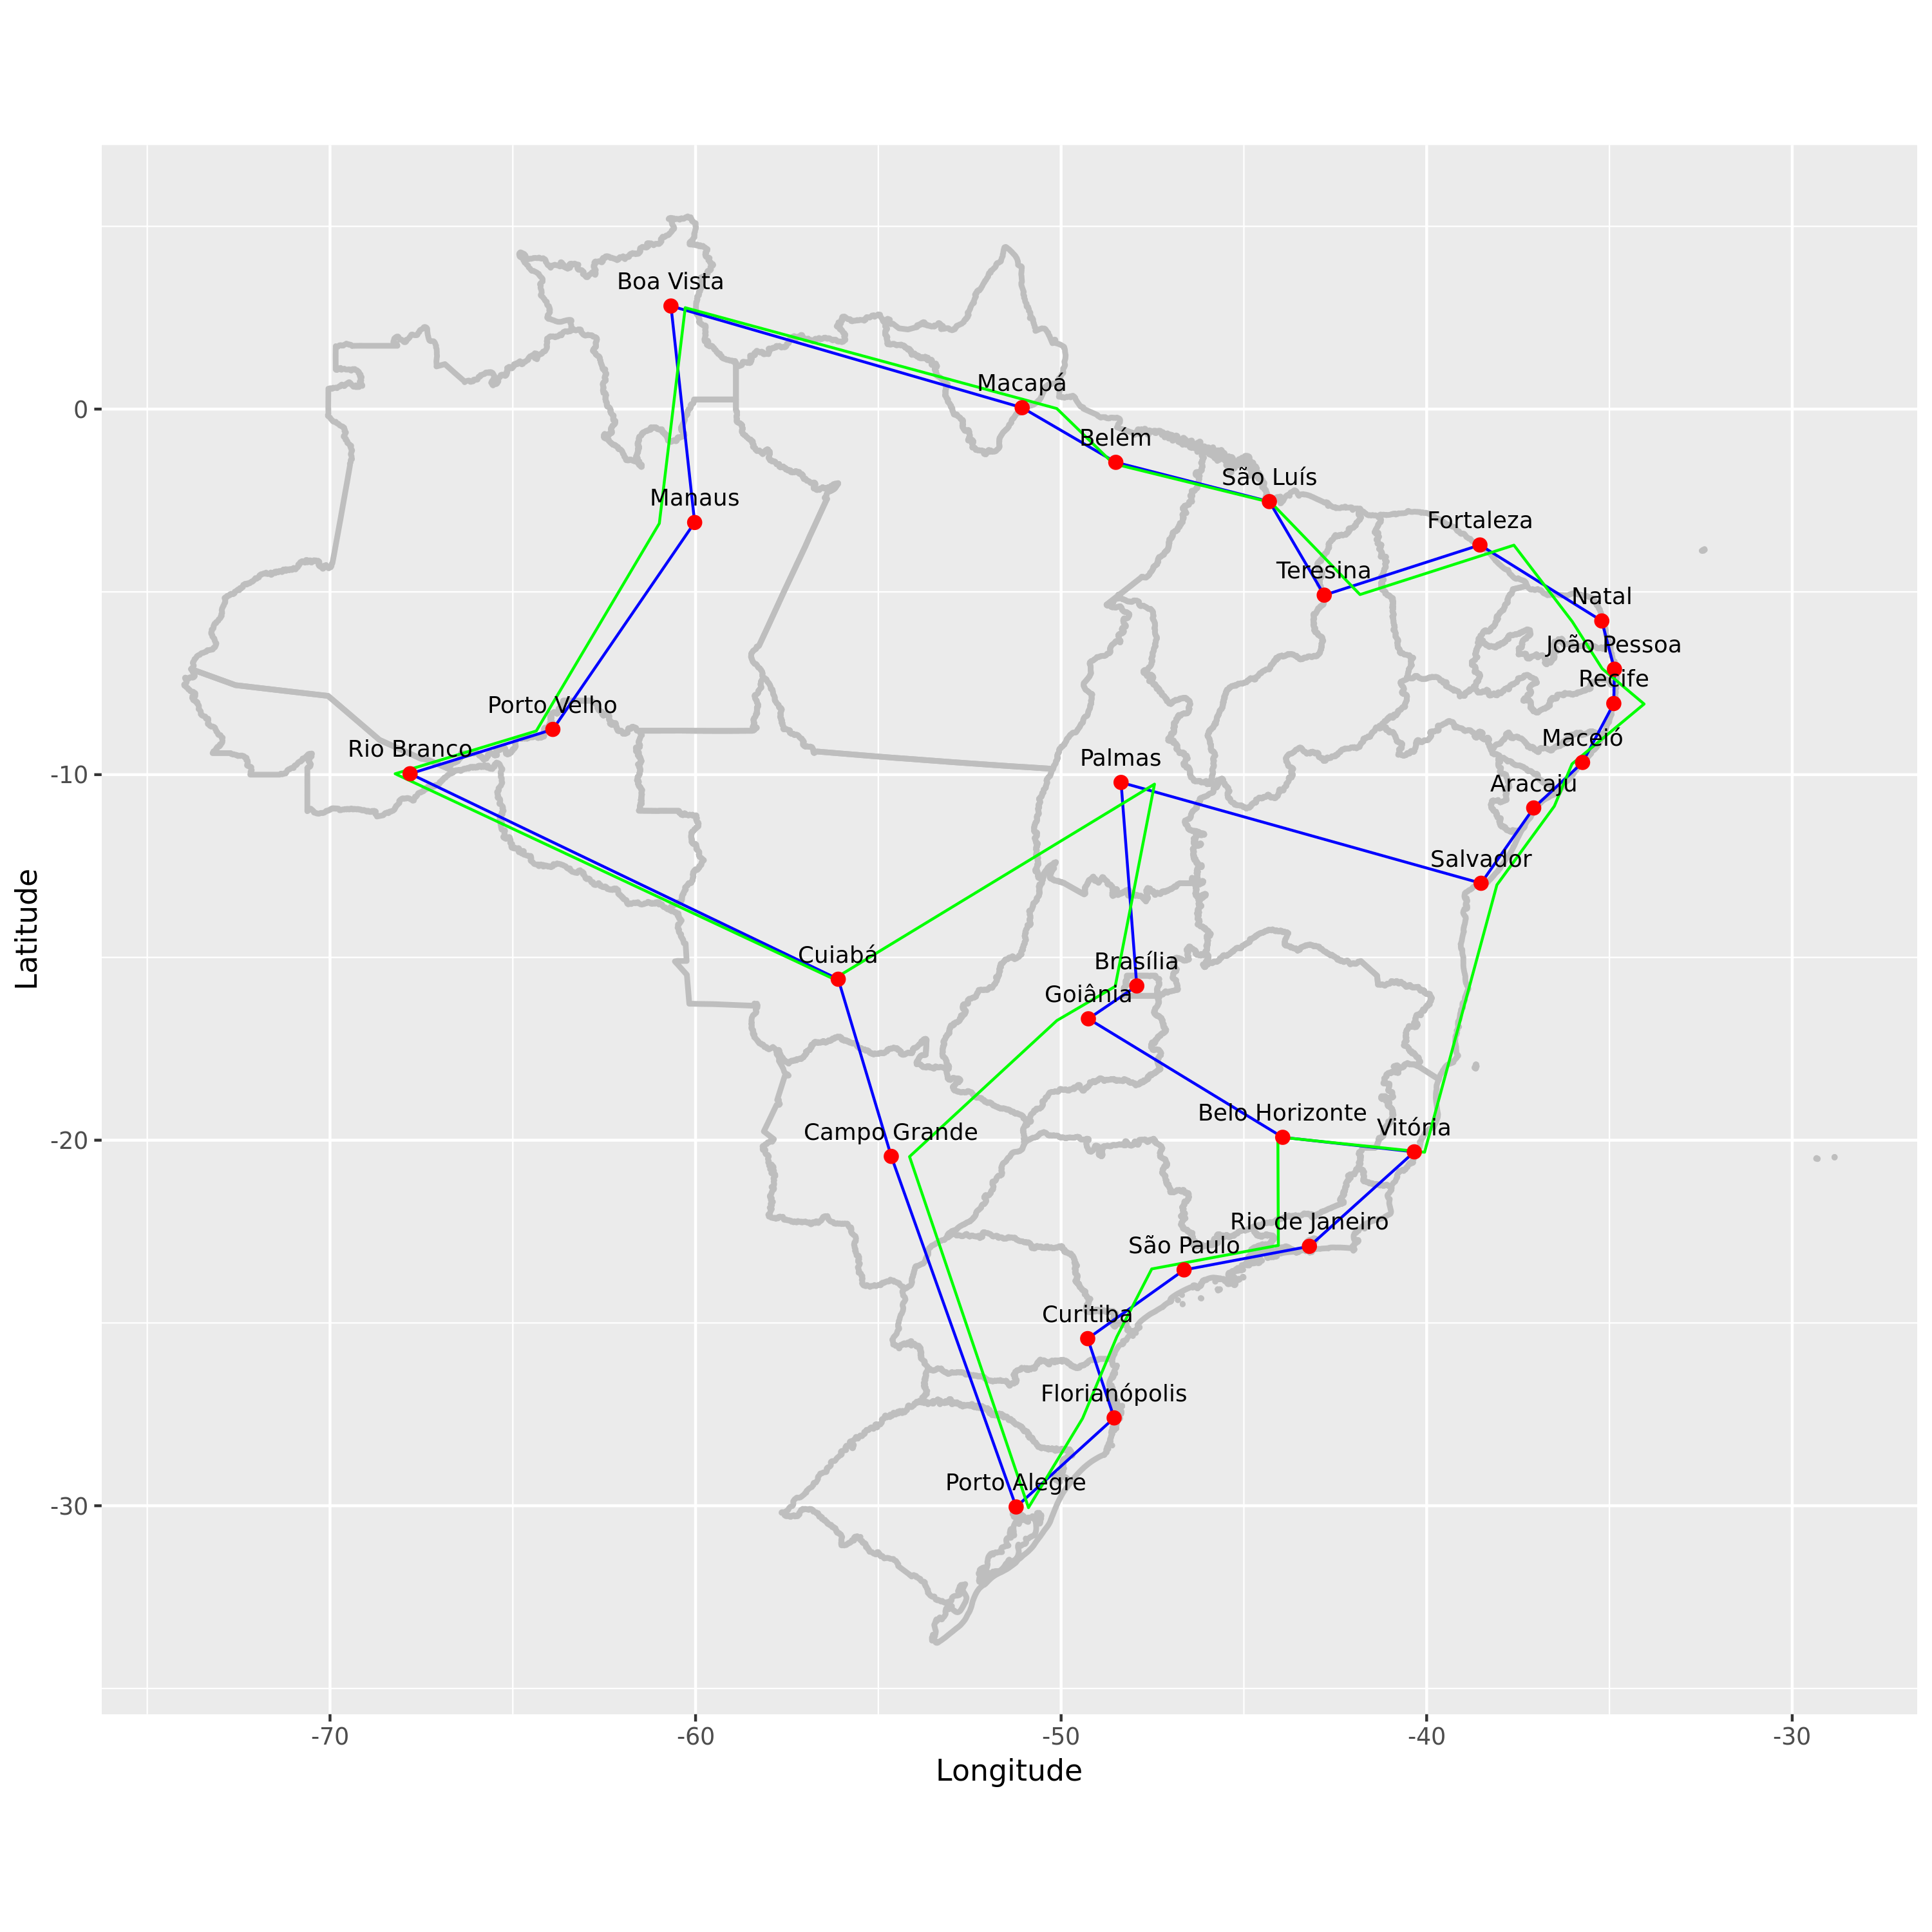

Fonte: Dan S. Reznik, *TSP for Brazilian State Capitals*. Acessível em https://github.com/dan-reznik/TSP-Brazilian-Capitals/blob/master/pics/tsp%20brazil%20ibge%20state%20polygons.png

# Todas as possíveis rotas

Embora saibamos que esta não é uma maneira prática de abordar casos com um número razoável de cidades, vamos começar com o algoritmo força bruta, ou seja, a enumeração de todas as possíveis rotas.

In [1]:
import matplotlib.pyplot as plt
import math
import random
import itertools


In [2]:
def forca_bruta(cidades):
    "Gera todas as possíveis rotas e escolhe a menor delas."
    return rota_mais_curta(todas_as_rotas(cidades))


def rota_mais_curta(rotas):
    "Escolhe a rota com menor tamanho."
    return min(rotas, key=tamanho_rota)


# TO DO: Tipos de dados: cidades, rotas, Funções: todas_as_rotas, tamanho_rota

**Detalhe**: no Python min(*conjunto, key=função*) significa achar o elemento que minimiza a função passada como chave.

## Representando uma rota

Uma rota pode ser representada por uma permutação das cidades a serem passadas. A ordem em que elas aparecem determina as distâncias a serem percorridas,pois duas cidades adjacentes representam um percurso.

In [3]:
todas_as_rotas = itertools.permutations


In [4]:
# Exemplo

cidades = [1, 2, 3, 4]
list(todas_as_rotas(cidades))

[(1, 2, 3, 4),
 (1, 2, 4, 3),
 (1, 3, 2, 4),
 (1, 3, 4, 2),
 (1, 4, 2, 3),
 (1, 4, 3, 2),
 (2, 1, 3, 4),
 (2, 1, 4, 3),
 (2, 3, 1, 4),
 (2, 3, 4, 1),
 (2, 4, 1, 3),
 (2, 4, 3, 1),
 (3, 1, 2, 4),
 (3, 1, 4, 2),
 (3, 2, 1, 4),
 (3, 2, 4, 1),
 (3, 4, 1, 2),
 (3, 4, 2, 1),
 (4, 1, 2, 3),
 (4, 1, 3, 2),
 (4, 2, 1, 3),
 (4, 2, 3, 1),
 (4, 3, 1, 2),
 (4, 3, 2, 1)]

In [5]:
def tamanho_rota(rota):
    "A distância total percorrida entre dois pares consecutivos em uma rota"
    return sum(distancia(rota[i - 1], rota[i]) for i in range(len(rota)))


# TO DO: Função: distancia, Tipo de dados: cidades

**Detalhe**: Aqui usamos um truque específico do Python no qual 

```
distancia(rota[-1], rota[0])
```

 se refere a distância entre o primeiro e o último elemento do vetor rota.

## Representando cidades

Cada cidade será representada como um ponto no espaço euclidiano $\mathbb{R}^2$ e a distância entre duas cidades é a distância euclidiana.

Neste caso temos um PCV simétrico, métrico, euclidiano.

Simétrico significa que a relação de distância é simétrica, ou seja: $\forall u, v \ : \ distancia(u,v) = distancia(v,u)$

Métrico significa que as distâncias obedecem desigualdades trianguelares, ou seja: $\forall u, v, w \ : \ distancia(u,v) \leq distancia(u, w) + distancia(w, v)$

E finalmente euclidiano significa que a distância euclidiana é a medida de distância utilizada. Essa definição é suficiente para as duas anteriores.




## Computando distâncias

No Python já temos a distância euclidiana disponível na biblioteca matemática, portanto vamos apenas renomeá-la por conveniência nos códigos a seguir:

In [6]:
distancia = math.dist


In [7]:
# Exemplo
A = [3, 0]
B = [0, 4]
print(distancia(A, B))

5.0


## Conjunto de cidades aleatórias

Para efeitos de nossos tester vamos considerar inicialmente a geração de instâncias aleatórias. Para isso vamos utilizar a geração de duplas que presentam as coordenadas euclidianas de cada cidade.

In [8]:
[[random.randrange(1000), random.randrange(1000)] for c in range(7)]

[[520, 469],
 [728, 184],
 [598, 165],
 [919, 717],
 [977, 27],
 [652, 145],
 [207, 841]]

Encapsulando isto em uma função e pensando nas dimensões da visualização, escrevemos a seguinte função de geração de uma instância aleatória.

In [9]:
def Cidades(n, largura=900, altura=600, rseed=233):
    "Faz um conjunto com n cidades, com coordenadas aleatórias no máximo (largura x alutura)"
    random.seed(rseed)
    return [[random.randrange(largura), random.randrange(altura)] for c in range(n)]

A seguir usamos a função de geração de um conjunto de 10 cidades e passamos para o algoritmo força bruta, cujo retorno a melhor rota para o caixeiro viajante, escrevendo uma sequência de coordenadas do espaço euclidiano, referentes à rota do caixeiro.

In [10]:
forca_bruta(Cidades(10))


([698, 178],
 [710, 14],
 [85, 104],
 [78, 243],
 [275, 239],
 [537, 236],
 [564, 209],
 [620, 232],
 [819, 495],
 [767, 291])

## Desenhando a solução

Para entender melhor o que se passa na solução apresentada pelos algoritmos vamos elaborar uma visualização simples da instância e da rota. Caso o parâmetro "completa" seja verdadeiro, vamos imprimir as arestas entre qualquer par de vértices.

In [11]:
def plot_rota(rota, completa=True, dot_color="Blue", line_color="Red", style=None):
    x = []
    y = []
    for i in range(len(rota)):
        x.append(rota[i][0])
        y.append(rota[i][1])

    if style is not None:
        plt.style.use(style)
    if completa:
        for i in range(len(rota) - 1):
            for j in range(i + 1, len(rota)):
                plt.plot([x[i], x[j]], [y[i], y[j]], color="LightGray", linewidth=1)

    for i in range(len(rota)):
        plt.plot([x[i], x[i - 1]], [y[i], y[i - 1]], color=line_color, linewidth=2)

    plt.scatter(x, y, color=dot_color, linewidth=3)

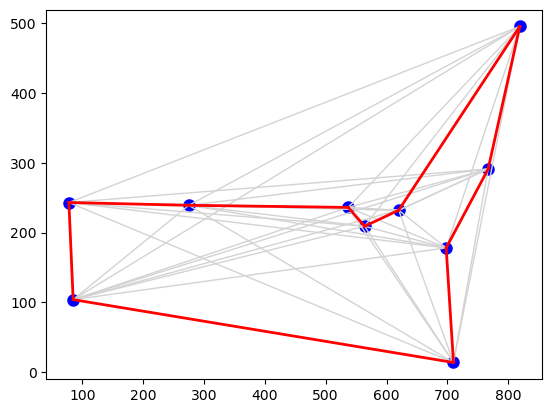

In [12]:
plot_rota(forca_bruta(Cidades(10)))


## Complexidade de enumerar todas as rotas
Demora cerca de 2 segundos na minha máquina para resolver este problema de 10 cidades. Em geral, a função TSP considera (n-1)! passeios para um problema de n cidades, e cada passeio tem n cidades, então o tempo total necessário para n cidades deve ser aproximadamente proporcional a n!. Isso significa que o tempo cresce rapidamente com o número de cidades. Realmente rapidamente. Esta tabela mostra o tempo real para resolver um problema de 10 cidades e o tempo esperado para resolver problemas maiores:



 |n	|tempo esperado|
  |:- |:-|
  |10	|10! rotas = 2 seg|
  |11	|2 seg × 11! / 10! ≈ 22 seg|
  |12	|2 seg × 12! / 10! ≈ 4 min|
  |14	|2 seg × 14! / 10! ≈ 13 horas|
  |16	|2 seg × 16! / 10! ≈ 200 dias|
  |18	|2 seg × 18! / 10! ≈ 112 anos|
  |25	|2 seg × 25! / 10! ≈ 270 bilhões de anos|


Vamos precisar de uma forma melhor...

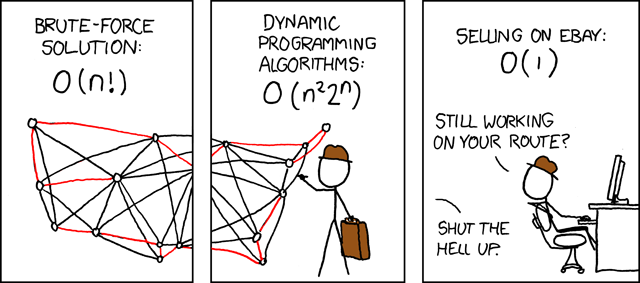

Fonte: Randall Munroe. *Travelling Salesman Problem*. Acessível em https://xkcd.com/399/

# Heurísticas construtivas

E se estivermos dispostos a nos contentar com um passeio curto, mas sem garantia de ser o mais curto? Então, podemos economizar bilhões de anos de tempo de computação: mostraremos algoritmos aproximados, que encontram passeios que normalmente estão dentro de 10% do passeio mais curto possível e podem lidar com milhares de cidades em poucos segundos. (Observação: existem algoritmos aproximados mais sofisticados que podem lidar com centenas de milhares de cidades e chegar a 0,01% ou mais do passeio mais curto possível.)

Então, como chegamos a um algoritmo aproximado? Aqui estão dois planos gerais de como criar um tour:



*   **Algoritmo do vizinho mais próximo**: Faz o tour ir de uma cidade até sua vizinha mais próxima. Repita.
*   **Algoritmo guloso**: Encontre a distância mais curta entre quaisquer duas cidades e inclua essa aresta no passeio sem formar trevos ou subciclos. Repita.         






Vamos expandir essas ideias em algoritmos completos.


## Vizinho mais próximo

Uma heurística construtiva que surge como uma primeira ideia é a seguinte: a partir de uma nó inicial, escolher para qual nó ir em seguida simplesmente selecionando o trajeto mais curto.

Esta é uma estratégia gulosa, pois a cada instante em que uma decisão precisa ser tomada para a construção da rota, o critério de otimização é usado sem que haja posteriormente uma reconsideração sobre aquela decisão.


In [13]:
def vizinho_mais_proximo(cidades):
    """Comece a rota na primeira cidade; a cada passo estenda a rota
    movendo-se da cidade anterior para a vizinha mais próxima
    que ainda não foi visitada."""
    primeira = cidades[0]
    rota = [primeira]
    inexploradas = cidades.copy()
    inexploradas.remove(primeira)
    while inexploradas:
        C = mais_proxima(rota[-1], inexploradas)
        rota.append(C)
        inexploradas.remove(C)
    return rota


def mais_proxima(c, cidades):
    "Encontre a cidade mais próxima da cidade c."
    return min(cidades, key=lambda x: distancia(c, x))

Detalhe: Em Python, assim como na teoria da computação, lambda (ou λ) é o símbolo para função, então "lambda x: distancia(c, x)" significa a função de x que calcula a distância de x para a cidade c.

Podemos comparar o rápido (porém inexado) algoritmo de vizinho mais próximo ao lento (porém exato) algoritmo de enumeração de todas as rotas para um conjunto pequeno:

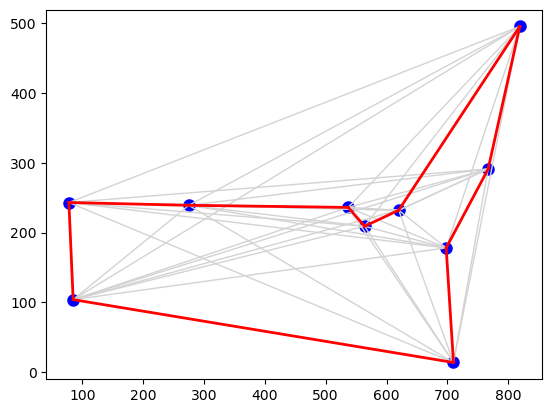

In [14]:
plot_rota(forca_bruta(Cidades(10)))


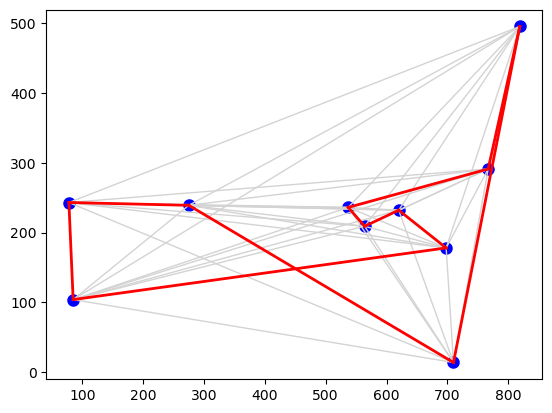

In [15]:
plot_rota(vizinho_mais_proximo(Cidades(10)))


Outra forma de compara é saber a qual a distância percentual da melhor solução obtida para a solução ótima dada pelo algoritmo que enumera todas as rotas. Essa distância é conhecida como *gap*.

In [16]:
def gap(cidades):
    "Gap percentual entre o algoritmo de vizinho mais próximo e o algoritmo de todas as rotas."
    opt = tamanho_rota(forca_bruta(cidades))
    cnd = tamanho_rota(vizinho_mais_proximo(cidades))
    return (cnd - opt) / opt

Para um resultado mais confiável podemos rodar um número maior de vezes.

In [17]:
gaps = sorted(gap(Cidades(10, rseed=i)) for i in range(10))
[print("{0:0.2f}".format(x)) for x in gaps]
mean = sum(gaps) / len(gaps)
print("Media = ", "{0:0.2f}".format(mean))
print(
    "Desvio Padrão = ",
    "{0:0.2f}".format((sum([((x - mean) ** 2) for x in gaps]) / len(gaps)) ** 0.5),
)

0.00
0.00
0.00
0.15
0.19
0.20
0.23
0.24
0.25
0.29
Media =  0.15
Desvio Padrão =  0.11


Sabemos que é pior, mas podemos agora dar respostas para uma entrada com centenas ou milhares de cidades. 

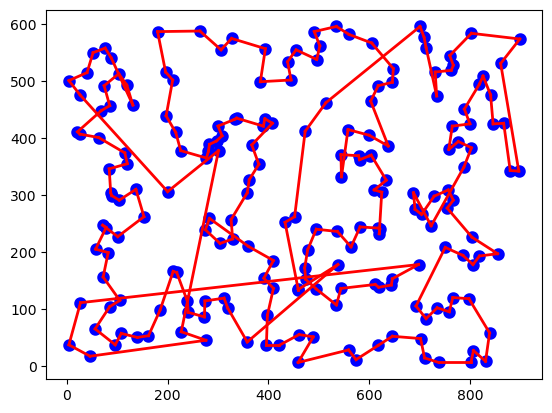

In [18]:
plot_rota(vizinho_mais_proximo(Cidades(200)), completa=False)

### Resultados podem variar dependendo do ponto de partida

A cidade inicial escolhida define toda a sequência de decisões que serão tomadas. Ao mudarmos a cidade inicial, é possível observar leves variações sobre a rota utilizada. Vamos então definir um algoritmo em que é possível selecionar o ponto de partida e avaliar como isso pode variar.

In [19]:
def vmp(cidades, inicio):
    """Comece a rota na primeira cidade; a cada passo estenda a rota
    movendo-se da cidade anterior para a vizinha mais próxima
    que ainda não foi visitada."""
    primeira = cidades[inicio]
    rota = [primeira]
    inexploradas = cidades.copy()
    inexploradas.remove(primeira)
    while inexploradas:
        C = mais_proxima(rota[-1], inexploradas)
        rota.append(C)
        inexploradas.remove(C)
    return rota

Se quisermos obter o melhor valor possível com essa heurística podemos executá-la para todos as cidades como ponto inicial.

In [20]:
def vmp_completa(cidades):
    return rota_mais_curta([vmp(cidades, i) for i in range(len(cidades))])

A seguir vamos fazer comparações com as rotas geradas a partir de pontos diferentes e a melhor rota possível com esta estratégia.

Tamanho =  10799.126338818005


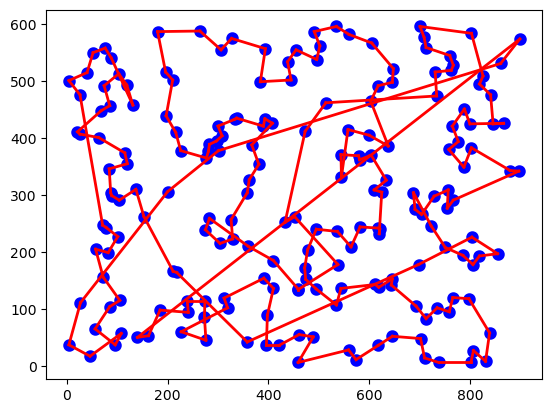

In [21]:
rota = vmp(Cidades(200), 122)
print("Tamanho = ", tamanho_rota(rota))
plot_rota(rota, completa=False)

Tamanho =  10226.428015396954


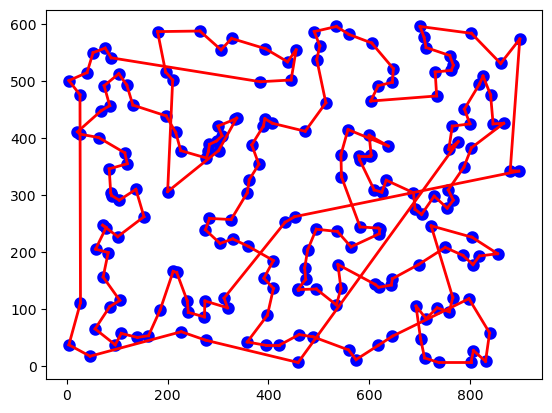

In [22]:
rota = vmp(Cidades(200), 78)
print("Tamanho = ", tamanho_rota(rota))
plot_rota(rota, completa=False)

Tamanho =  9947.59311490794


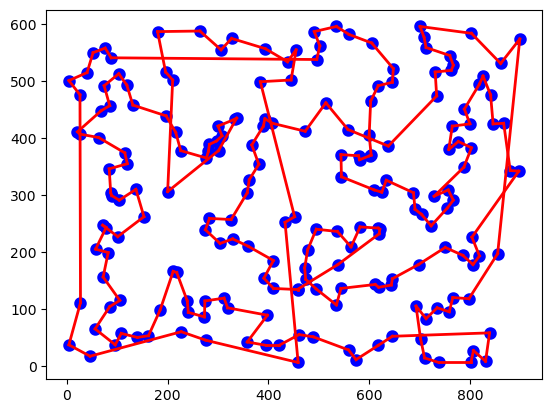

In [23]:
rota = vmp(Cidades(200), 13)
print("Tamanho = ", tamanho_rota(rota))
plot_rota(rota, completa=False)

Tamanho =  9348.6722200493


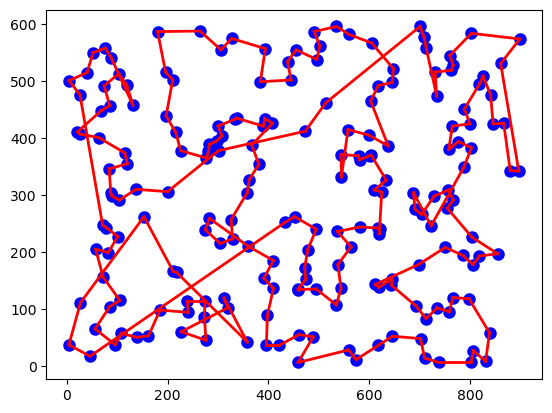

In [24]:
rota = vmp_completa(Cidades(200))
print("Tamanho = ", tamanho_rota(rota))
plot_rota(rota, completa=False)

### Caso ruim: outliers

É possível construir casos onde a estratégia de partir de uma cidade para a mais próxima acaba gerando uma sobrecarga muito grande para as cidades deixadas para o final da rota.

Um exemplo pode ser visto a seguir.

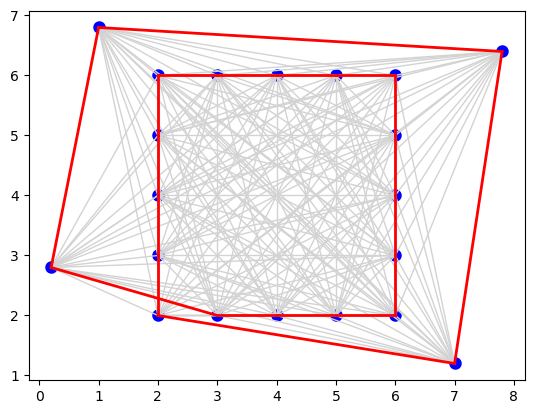

In [25]:
outliers = [[2, 2],  [2, 3],  [2, 4],  [2, 5],  [2, 6],  
                 [3, 6],  [4, 6],  [5, 6],  [6, 6],  
                 [6, 5],  [6, 4],  [6, 3],  [6, 2],  
                 [5, 2],  [4, 2],  [3, 2],  
                 [1, 6.8],  [7.8, 6.4],  [7, 1.2],  [0.2, 2.8]]

plot_rota(vizinho_mais_proximo(outliers))

## Heurística gulosa para o PCV

Uma possibilidade para superar a "miopia" das escolhas locais seria olhar para todas as arestas do grafo antes de tomar uma decisão. Neste sentido a heurística gulosa trabalha com o conjunto de todas as arestas e em ordem crescente de distância verifica se ela pode ser incluída na rota, sem que isto forme trevos ou subciclos.

De fato o algoritmo vai trabalha com um vetor que indica para cada vértice se ele pode se conectar a um outro vértice. Isto só é possível se estes candidatos a uma conexão forem nós terminais dos segmentos que compomos no processo de construção da rota. Guardamos portanto o segmento para qual cada vértica é um terminal. Note que inicialmente todos são terminais de um segmento unitário.

In [26]:
def guloso(cidades, verbose=False):
    """Percorre todas as arestas em ordem crescente e escolhe a primeira
    possível para fazer parte da solução"""
    arestas = ordena_arestas(cidades)
    terminais = [[c] for c in range(len(cidades))]  # A dict of {endpoint: segment}
    for [u, v] in arestas:
        if terminais[u] != [] and terminais[v] != [] and terminais[u] != terminais[v]:
            rota = unir(terminais, u, v, verbose)
            if len(rota) == len(cidades):
                rota = [cidades[rota[i]] for i in range(len(cidades))]
                return rota


# TO DO: functions: ordena_arestas, unir

As arestas no algoritmo anterior são visitadas em ordem de tamanho. Para ordená-las utilizamos o código a seguir.

In [27]:
def ordena_arestas(cidades):
  "Retorna todas as arestas em uma lista ordenada pelo tamanho."
  arestas = [ [u, v] for u in range(len(cidades)) for v in range(len(cidades)) if u < v]
  return sorted(arestas, key=lambda aresta : distancia(cidades[aresta[0]], cidades[aresta[1]]))

Uma vez que identificamos uma aresta que conecta segmentos distintos pelos seus nós terminais, fazemos apelo a função unir definida abaixo para atualizar a lista de terminais.

In [28]:
def unir(terminais, u, v, verbose=False):
    "Une o segmento de u ao segmento de v, mantendo o vetor de terminais"
    useg, vseg = terminais[u], terminais[v]
    if (verbose) : print(useg, "(+) ", vseg, " => ", end='')
    if useg[-1] is not u: useg.reverse()
    if vseg[0] is not v: vseg.reverse()
    useg.extend(vseg)
    if (verbose) : print(useg)
    terminais[u] = []
    terminais[v] = []
    terminais[useg[0]] = terminais[useg[-1]] = useg
    return useg

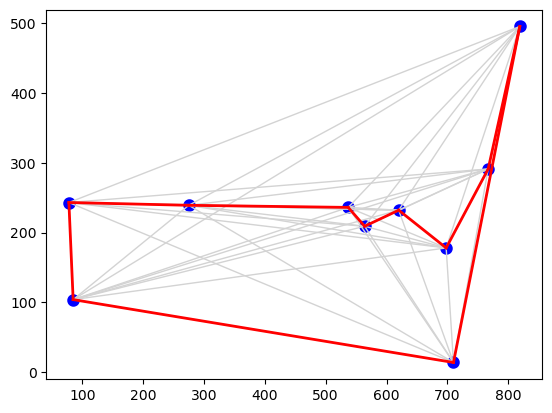

In [29]:
plot_rota(guloso(Cidades(10)))


A seguir observamos o desempenho do método, ligeiramente melhorado, para o caso dos outliers.

[0] (+)  [1]  => [0, 1]
[0, 1] (+)  [15]  => [1, 0, 15]
[1, 0, 15] (+)  [2]  => [15, 0, 1, 2]
[15, 0, 1, 2] (+)  [3]  => [15, 0, 1, 2, 3]
[15, 0, 1, 2, 3] (+)  [4]  => [15, 0, 1, 2, 3, 4]
[15, 0, 1, 2, 3, 4] (+)  [5]  => [15, 0, 1, 2, 3, 4, 5]
[15, 0, 1, 2, 3, 4, 5] (+)  [6]  => [15, 0, 1, 2, 3, 4, 5, 6]
[15, 0, 1, 2, 3, 4, 5, 6] (+)  [7]  => [15, 0, 1, 2, 3, 4, 5, 6, 7]
[15, 0, 1, 2, 3, 4, 5, 6, 7] (+)  [8]  => [15, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[15, 0, 1, 2, 3, 4, 5, 6, 7, 8] (+)  [9]  => [15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9] (+)  [10]  => [15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] (+)  [11]  => [15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] (+)  [12]  => [15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] (+)  [13]  => [15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] (+)  [14]  => [15, 0,

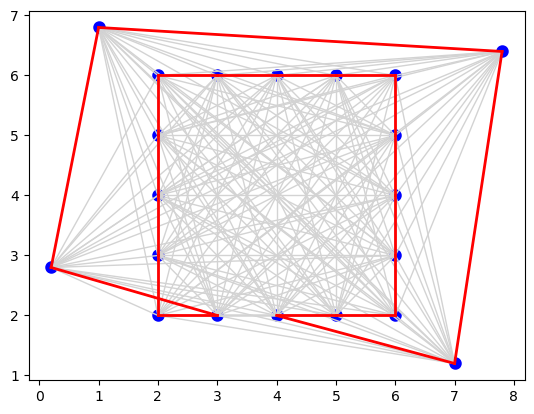

In [30]:
outliers = [[2, 2],  [2, 3],  [2, 4],  [2, 5],  [2, 6],  
                 [3, 6],  [4, 6],  [5, 6],  [6, 6],  
                 [6, 5],  [6, 4],  [6, 3],  [6, 2],  
                 [5, 2],  [4, 2],  [3, 2],  
                 [1, 6.8],  [7.8, 6.4],  [7, 1.2],  [0.2, 2.8]]

plot_rota(guloso(outliers, verbose=True))

## Procedimento de lapidação

Um dos ingredientes fundamentais para o funcionamento das metaheurísticas de trajetória é conseguir, a partir de uma solução, fazer ajustes para obter uma nova solução. Este processo de modificação é onipresente nesse tipo de heurística.

Aqui propomos uma modificação em que tomamos duas arestas $(u,v)$ e $(x,y)$ pertencentes a uma solução e propomos uma nova solução com as arestas $(u, x)$ e $(v, y)$. Para que isto seja possível também é preciso reverter (sem alteração de custo, já que estamos no caso simétrico) o caminho de $x$ para $y$ ou de $u$ para $v$

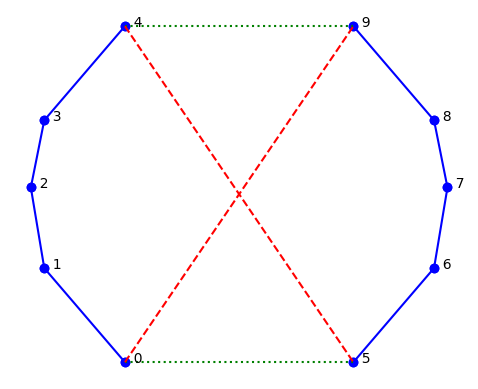

In [31]:
def plot_linhas(cidades, style='bo-'):
    "Plot lines to connect a series of points."
    x = [ p[0] for p in cidades ]
    y = [ p[1] for p in cidades ]
    plt.plot(x, y, style)
    plt.axis('scaled'); plt.axis('off')

def plot_nomes_linhas(cidades, *args):
    plot_linhas(cidades, 'bo')
    for (label, p) in enumerate(cidades):
        plt.text(p[0], p[1], '  '+str(label))
    # Draw lines indicated by args
    style = 'bo-'
    for arg in args:
        if isinstance(arg, str):
            style = arg
        else: # arg is a list of indexes into points, forming a line
            Xs = [cidades[i][0] for i in arg]
            Ys = [cidades[i][1] for i in arg]
            plt.plot(Xs, Ys, style)
    plt.axis('scaled'); plt.axis('off'); plt.show()       

cross = [ [9, 3],  [3, 10],  [2, 16],  [3, 21],  [9, 28], 
         [26, 3], [32, 10], [33, 16], [32, 21], [26, 28] ]

plot_nomes_linhas(cross, 'bo-', range(5), range(5, 10), 
                          'g:', (4, 9), (0, 5), 
                          'r--', (4, 5), (0, 9))

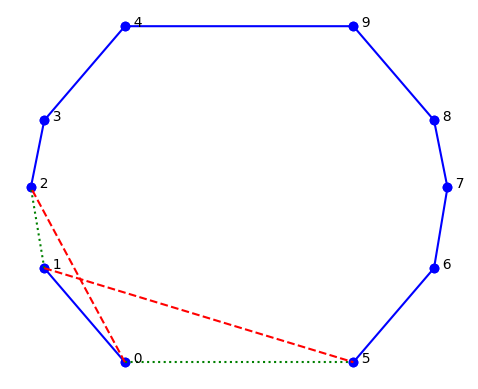

In [32]:
cross = [ [9, 3],  [3, 10],  [2, 16],  [3, 21],  [9, 28], 
         [26, 3], [32, 10], [33, 16], [32, 21], [26, 28] ]

plot_nomes_linhas(cross, 'bo-', range(2), [*range(2, 5), *range(9, 4, -1)], 
                          'g:', (1, 2), (0, 5), 
                          'r--', (1, 5), (0, 2))

In [33]:
def reverter(rota, i, j):
    "Se a reversão da rota [i:j] for mais curta então reverta."
    u, v, x, y = rota[i - 1], rota[i], rota[j - 1], rota[j % len(rota)]
    if distancia(u, v) + distancia(x, y) > distancia(u, x) + distancia(v, y):
        rota[i:j] = reversed(rota[i:j])

A seguir escrevemos um algoritmo que passa por todos os seguimentos da rota e verifica se é vantajoso alterar a rota.

In [34]:
def alterar_rota(rota):
    "Procura todas as possíveis reversões de segmentos"
    segmentos = todos_segmentos(len(rota))
    while True:
        tamanho_atual = tamanho_rota(rota)
        for u, v in segmentos:
            reverter(rota, u, v)
        if tamanho_rota(rota) >= tamanho_atual:
            break
    return rota


def todos_segmentos(n):
    "Retorna todos os pares que formam segmentos de caminho numa rota de tamanho n."
    return [(u, u + t) for t in range(n, 1, -1) for u in range(n - t + 1)]

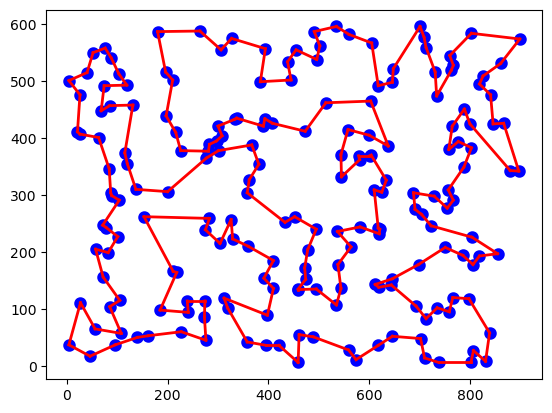

In [35]:
plot_rota(alterar_rota(vmp_completa(Cidades(200))), completa=False)


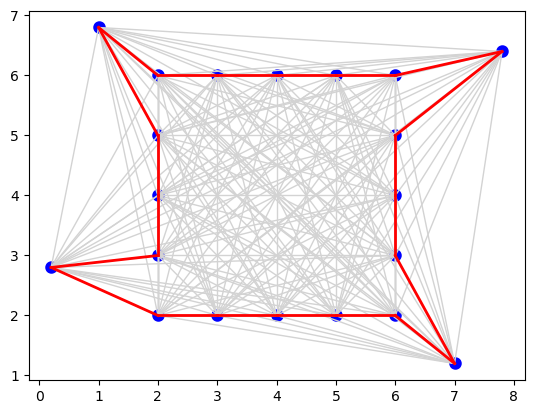

In [36]:
outliers = [[2, 2],  [2, 3],  [2, 4],  [2, 5],  [2, 6],  
                 [3, 6],  [4, 6],  [5, 6],  [6, 6],  
                 [6, 5],  [6, 4],  [6, 3],  [6, 2],  
                 [5, 2],  [4, 2],  [3, 2],  
                 [1, 6.8],  [7.8, 6.4],  [7, 1.2],  [0.2, 2.8]]

plot_rota(alterar_rota(guloso(outliers)))

# Exercícios


1.   Com a heurística de vizinho mais próximo ```vmp```, verificamos que o ponto inicial pode alterar o valor da solução obtida. Avaliamos que poderíamos rodar o método para todos os possíveis pontos iniciais e pegar a melhor solução, ```vmp_completa```. Contudo isso pode ser bastante custoso. Elabore um método ```vmp_amostral``` que realiza uma amostra das cidades e constrói um conjunto de pontos iniciais amostral com 10% das cidades. Verifique como isso se compara ao valor de ```vmp_completa```

2.   O procedimento de lapidação ```reverter``` é uma modificação seletiva de uma solução, também conhecida, na literatura do problema do caixeiro viajante, como 2-OPT. Elabore um algoritmo do tipo subida da colina com (re-)início aleatório utilizando este procedimento. Compare o desempenho desta heurística com o desempenho dos algoritmos construtivos propostos. 



## Resolução

### Exercício 1

In [37]:
from numpy import arange, median

In [38]:
def vmp_amostral(cidades, fracao):
    amostra = random.sample(range(len(cidades)), round(fracao * len(cidades)))
    return rota_mais_curta([vmp(cidades, i) for i in amostra])

Vamos rodar o VMP amostral para diferentes tamanhos de amostra e comparar os resultados num gráfico de barras.

In [39]:
cidades = Cidades(200)
rota_vmp_completa = vmp_completa(cidades)
rotas_vmp_amostral = {
    f"{fracao:.2f}": [vmp_amostral(cidades, fracao) for i in range(10)]
    for fracao in arange(0.01, 0.21, 0.03)
}
tamanhos = {"VMP completa": tamanho_rota(rota_vmp_completa)}
for fracao, rotas in rotas_vmp_amostral.items():
    tamanhos.update({f"amostral {fracao}": median(list(map(tamanho_rota, rotas)))})

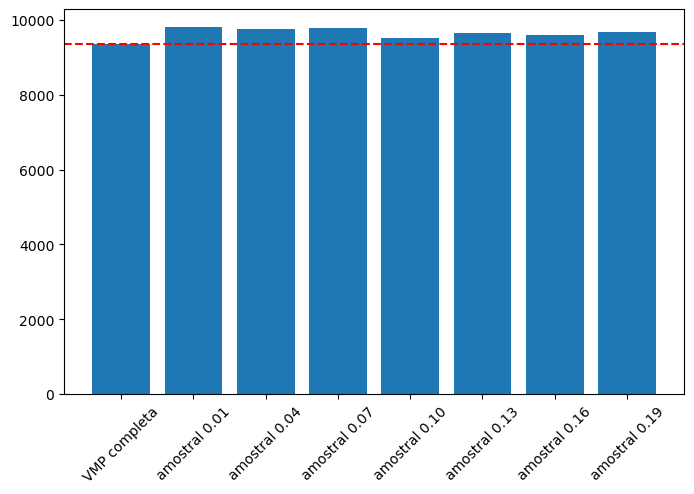

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
xticks, valores = zip(*enumerate(tamanhos.values()))
ax.bar(xticks, valores)
ax.axhline(y=valores[0], color="red", linestyle="--")
ax.set_xticks(xticks)
ax.set_xticklabels(tamanhos.keys(), rotation=45);

Para uma performance muito melhor, temos um resultado muito próximo. Certamente vale a pena substituir o VMP completo pelo amostral caso queiramos utilizar a rotina para gerar uma solução inicial. A seguir, vamos repetir o experimento para o mesmo tamanho amostral de 10%, mas para diferentes quantidades de nós. Os resultados corroborarão a nossa conclusão.

In [41]:
tamanhos_amostrais = {}
tamanhos_completa = []
for tamanho in range(50, 401, 50):
    cidades = Cidades(tamanho)
    tamanhos_completa.append(tamanho_rota(vmp_completa(cidades)))
    tamanhos_amostrais.update(
        {
            f"{tamanho=}": median(
                list(map(tamanho_rota, [vmp_amostral(cidades, 0.1) for i in range(10)]))
            )
        }
    )

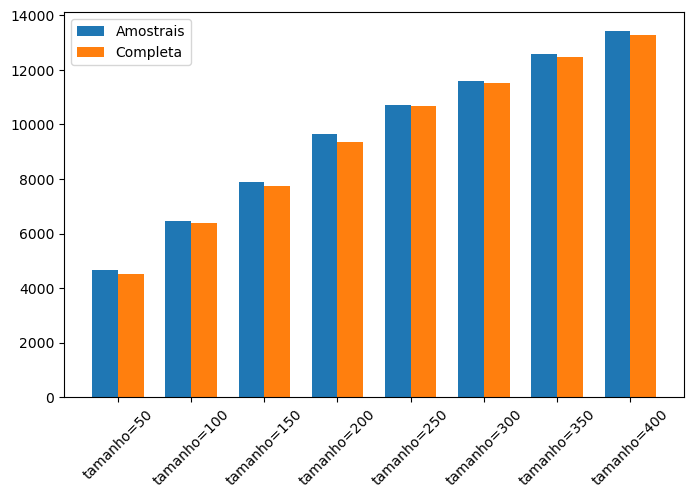

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
xlabels, valores_amostrais = zip(*tamanhos_amostrais.items())
valores_completos = tamanhos_completa
xticks = arange(1, len(xlabels) + 1)
largura_da_barra = 0.35
barras1 = ax.bar(xticks - largura_da_barra/2, valores_amostrais, width=largura_da_barra, label='Amostrais')
barras2 = ax.bar(xticks + largura_da_barra/2, valores_completos, width=largura_da_barra, label='Completa')
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels, rotation=45);
ax.legend();

### Exercício 2

In [43]:
from functools import reduce
from numpy import linspace
from numpy.random import default_rng
from numpy.random._generator import Generator
from typing import List, Callable, Tuple, Set

#### Algoritmo de subida na colina

Antes de tudo, vamos definir nossa função de otimização. Ela deve ser o mais genérica possível, tanto para contribuir com trabalhos posteriores como para permitir a maior personalização. 

In [44]:
def subida_na_colina_com_reinicio_aleatorio(
    solucao_inicial: List,
    validar_solucao: Callable[[List], bool],
    avaliar_solucao: Callable[[List], int],
    modificar_solucao: Callable[[List], List],
    sortear_solucao: Callable[[List], List],
    max_iteracoes_subida=100,
    max_iteracoes_reinicio=100,
) -> List:
    """Um algoritmo genérico de subida na colina com reinício aleatório. Recebe subrotinas
    como parâmetros.

    Args:
        solucao_inicial (List): Sequência inicial.\n
        validar_solucao (Callable[[List], bool]): Rotina para determinar se uma solução é válida.\n
        avaliar_solucao (Callable[[List], int]): Rotina para dar um valor objetivo a uma solução.\n
        modificar_solucao (Callable[[List], List]): Rotina de diversificação da solução. Usada para gerar novas soluções a partir de anteriores.\n
        sortear_solucao (Callable[[List], List]): Rotina para gerar uma nova solução aleatoriamente, ainda normalmente usando uma solução anterior.\n
        max_iteracoes_subida (int, optional): Número de iterações da rotina de subida. Defaults to 100.\n
        max_iteracoes_reinicio (int, optional): Número de iterações da rotina de sorteio. Defaults to 100.\n

    Returns:
        List: Uma sequência representando a melhor solução encontrada.
    """
    melhor = solucao_inicial.copy()
    solucao_atual = solucao_inicial.copy()

    for _ in range(max_iteracoes_reinicio):
        for _ in range(max_iteracoes_subida):
            solucao_candidata = modificar_solucao(solucao_atual.copy())
            if not validar_solucao(solucao_candidata):
                continue
            if avaliar_solucao(solucao_candidata) < avaliar_solucao(solucao_atual):
                solucao_atual = solucao_candidata.copy()

        if avaliar_solucao(solucao_atual) < avaliar_solucao(melhor):
            melhor = solucao_atual.copy()
        while True:
            solucao_atual = sortear_solucao(solucao_atual.copy())
            if validar_solucao(solucao_atual):
                break
    return melhor

#### Preparando o 3-OPT

Antes mesmo de prosseguir com a execução do algoritmo de subida, já devo mencionar que será necessária uma subrotina mais poderosa do que o 2-OPT para obtermos resultados melhores do que apenas aplicar o 2-OPT numa solução inicial qualquer. Isto ocorre porque o 2-OPT tem um custo de apenas $O(n^2)$, permitindo fácil aplicação a muitas instâncias, e também porque ele é uma heurística muito eficiente, dando bons resultados em geral. É uma certa dificuldade desenvolver um algoritmo melhor do o 2-OPT.

Por isso, vamos adaptar a rotina de `reverter` para o 3-OPT, mas não aplicaremos o 3-OPT completo $(O(n^3))$. Ao invés disso, vamos amostrar uma quantidade de trocas 3-OPT durante a diversificação da solução. Vai ser ligeiramente complexo desenvolver a lógica de trocas do 3-OPT.

Começamos por definir uma função que determina se uma sequência de trocas é válida. Ela parece genérica, mas só contém critérios o suficiente para o 3-OPT. 

In [45]:
def criterio_trocas_3_opt(pares: Tuple[Set[int]]):
    """Determina se a sequência de trocas `pares` resulta numa trilha válida,
    dentro da lógica do 3-OPT.
    
    Obs: Trabalha com indexação iniciada em 1.
    """    
    n = len(pares)
    m = len(pares[0])
    teste = [set([i, i+1]) for i in range(1, n*2 + 1)] + [set((1,n * 2))]
    if sum([x not in teste for x in pares]) != n: return False
    for i, a in enumerate(pares, 1):
        for b in pares[i:]:
            if len(a - b) != m: return False
    return True

Entretanto, ao utilizar essa função, devemos estar passando sequências de pares representando as novas arestas que serão formadas. Dada uma lista de todas as combinações de 3 arestas possíveis (bem ou mal formuladas), a aplicação repetida da `criterio_trocas_3_opt` irá determinar as que resultam em trilhas válidas. A seguir, vamos gerar todas essas combinações com ajuda do `itertools` e filtrá-las utilizando `criterio_trocas_3_opt` dentro da função `combinacoes_validas_3_opt`.

In [46]:
def combinacoes_validas_3_opt(indices: List[int]) -> List[Tuple[Set[int]]]:
    """Recebe uma lista de índices (`int`) respectivos à extremidades de arestas (nós)
    e a embaralha em permutações que alteram a trilha do PCV mantendo sua validade.

    Args:
        indices (List[int]): Índices que devem ser permutados.

    Returns:
        List: Uma lista de sequências representando as novas orientações dos segmentos da trilha.
    """    
    combs = itertools.combinations(indices, 2)
    combin_sets = [set(pair) for pair in combs]
    default = tuple([set((indices[i], indices[i+1])) for i in range(0, len(indices),2)])
    return [default, *tuple(filter(criterio_trocas_3_opt, itertools.combinations(combin_sets, 3)))]

Exemplo de aplicação:

In [47]:
combinacoes_validas_3_opt(range(1, 7))

[({1, 2}, {3, 4}, {5, 6}),
 ({1, 3}, {2, 5}, {4, 6}),
 ({1, 4}, {2, 5}, {3, 6}),
 ({1, 4}, {2, 6}, {3, 5}),
 ({1, 5}, {2, 4}, {3, 6})]

Para facilitar o acesso aos índices gerados, iremos "achatar" as sequências em listas de inteiros, assim poderemos iterar sobre todos os índices mais facilmente.

In [48]:
trocas_legais_3_opt = combinacoes_validas_3_opt(range(1,7))
trocas_legais_3_opt = list(map(lambda z: reduce(lambda x, y: x + list(y), z, []), trocas_legais_3_opt))
trocas_legais_3_opt

[[1, 2, 3, 4, 5, 6],
 [1, 3, 2, 5, 4, 6],
 [1, 4, 2, 5, 3, 6],
 [1, 4, 2, 6, 3, 5],
 [1, 5, 2, 4, 3, 6]]

#### Definição do 3-OPT amostral

Finalmente podemos definir as rotinas relacionadas ao 3-OPT. Todo esse desenvolvimento foi apenas para conseguirmos determinar as regras para trocas válidas acima. A variável global `trocas_legais_3_opt` irá ajudar a economizar espaço na rotina abaixo, quando precisamos calcular qual sequência de trocas dá a menor distância total, mas a lógica de realização das reversões ainda tem que ser escrita manualmente.

In [49]:
def reverter_3_opt(rota: List, i: int, j: int, k: int):
    assert i < j < k, "Precisamos que i < j < k."
    #            1          2        3          4         5             6
    nos = [rota[i - 1], rota[i], rota[j - 1], rota[j], rota[k - 1], rota[k % len(rota)]]
    distancias = {}
    for sinal, idx in enumerate(trocas_legais_3_opt):
        u, v, x, y, w, z = [nos[idx[k] - 1] for k in range(6)]
        distancias[sinal] = distancia(u, v) + distancia(x, y) + distancia(w, z)
    sinal_do_minimo = min(distancias, key=distancias.get)

    if sinal_do_minimo == 1:
        rota[i:j], rota[j:k] = reversed(rota[i:j]), reversed(rota[j:k])
    elif sinal_do_minimo == 2:
        rota[i:j], rota[j:k] = reversed(rota[i:j]), reversed(rota[j:k])
        rota[i:k] = reversed(rota[i:k])
    elif sinal_do_minimo == 3:
        rota[j:k] = reversed(rota[j:k])
        rota[i:k] = reversed(rota[i:k])
    elif sinal_do_minimo == 4:
        rota[i:j] = reversed(rota[i:j])
        rota[i:k] = reversed(rota[i:k])

A seguir, temos uma célula com código preliminar utilizado para descobrir como escrever as regras de troca acima. Ela exemplifica como o processo de troca funciona.

In [50]:
itour = list(range(1, 11))
#                       0      1       2      3      4      5      6      7      8
rota = itour.copy()  # (a, b) (b, c) (c, d) (d, e) (e, f) (f, g) (g, h) (h, i) (i, j)
i, j, k = 1, 3, 5  # nodes = 0, 1, 2, 3, 4, 5 -> a, b, c, d, e
rota[i:j], rota[j:k] = reversed(rota[i:j]), reversed(rota[j:k])
print(rota)
print([f"({rota[i]}, {rota[i+1]})" for i in range(len(rota) - 1)])

rota = itour.copy()
rota[i:j], rota[j:k] = reversed(rota[i:j]), reversed(rota[j:k])
rota[i:k] = reversed(rota[i:k])
print(rota)
print([f"({rota[i]}, {rota[i+1]})" for i in range(len(rota) - 1)])

rota = itour.copy()
rota[j:k] = reversed(rota[j:k])
rota[i:k] = reversed(rota[i:k])
print(rota)
print([f"({rota[i]}, {rota[i+1]})" for i in range(len(rota) - 1)])

rota = itour.copy()
rota[i:j] = reversed(rota[i:j])
rota[i:k] = reversed(rota[i:k])
print(rota)
print([f"({rota[i]}, {rota[i+1]})" for i in range(len(rota) - 1)])

[1, 3, 2, 5, 4, 6, 7, 8, 9, 10]
['(1, 3)', '(3, 2)', '(2, 5)', '(5, 4)', '(4, 6)', '(6, 7)', '(7, 8)', '(8, 9)', '(9, 10)']
[1, 4, 5, 2, 3, 6, 7, 8, 9, 10]
['(1, 4)', '(4, 5)', '(5, 2)', '(2, 3)', '(3, 6)', '(6, 7)', '(7, 8)', '(8, 9)', '(9, 10)']
[1, 4, 5, 3, 2, 6, 7, 8, 9, 10]
['(1, 4)', '(4, 5)', '(5, 3)', '(3, 2)', '(2, 6)', '(6, 7)', '(7, 8)', '(8, 9)', '(9, 10)']
[1, 5, 4, 2, 3, 6, 7, 8, 9, 10]
['(1, 5)', '(5, 4)', '(4, 2)', '(2, 3)', '(3, 6)', '(6, 7)', '(7, 8)', '(8, 9)', '(9, 10)']


Como não faremos todas as possíveis $O(n^3)$ trocas 3-OPT, precisamos sortear triplas de índices que corresponderão aos segmentos que serão substituídos. A princípio iremos sortear uma tripla por vez, e as repetições das trocas de segmentos serão delegadas para a função da modificação durante a fase de itensificação da subida na colina. A função abaixo sorteia uma tripla de índices espaçados em no mínimo duas unidades. Note que ela pode recebe um gerador de números aleatórios para dar melhor controle sobre os resultados.

In [51]:
def sortear_indices_nao_consecutivos(n: int, rng: Generator = None) -> List[int]:
    """Gera uma amostra de três índices de um total de `n`, espaçados por no mínimo duas unidades."""
    if n < 6: raise ValueError("Rotina inválida para n < 6.")
    if rng is None: rng = default_rng()
    while True:
        try:
            copia = list(range(n))
            idxs = []
            escolhidos = []
            while len(idxs) < 3:
                tamanho = len(copia)
                if tamanho < 3:
                    escolhidos.append(copia[0])
                    break
                idx = rng.choice(tamanho, replace=False)
                idxs.append(idx)
                escolhidos.append(copia[idx])
                # print(f'{idxs=} {copia=} {escolhidos=}')
                deslocamento = 0
                if idx > 0: 
                    del copia[idx-1] 
                    deslocamento += 1
                del copia[idx - deslocamento]
                if idx < tamanho - 1: del copia[idx - deslocamento]
            return sorted(escolhidos)
        except IndexError:
            continue

print("Exemplo: ", sortear_indices_nao_consecutivos(10))

Exemplo:  [1, 7, 9]


A seguir escrevemos um algoritmo que sorteia 3 segmentos da rota e verifica se é vantajoso alterar a rota. (Ele recebe um gerador de números aleatórios para exercer controle sobre os resultados)

In [52]:
def alterar_rota_3_opt_amostral(rota: List, rng: Generator, **kwargs):
    max_tentativas = kwargs['max_tentativas'] if 'max_tentativas' in kwargs else 10
    for _ in range(max_tentativas):
      tamanho_anterior = tamanho_rota(rota)
      segmento = sortear_indices_nao_consecutivos(len(rota), rng)
      reverter_3_opt(rota, *segmento)
      if tamanho_rota(rota) < tamanho_anterior: break
    return rota

#### Executando o algoritmo de subida na colina com reinício aleatório

Definiremos os elementos empregados na rotina de otimização. Após alguns testes, constatei que o 2-OPT é muito eficiente em encontrar uma solução razoável, o que vou exemplificar mais à frente. Por hora, **é preciso iniciar com a melhor solução inicial possível**, ou o 2-OPT irá simplesmente superar o algoritmo de busca. Por isso, elencaremos uma *solução original* de baixa qualidade (VMP completa), aplicaremos o 2-OPT através do `alterar_rota` e guardaremos para comparação, e por fim utilizaremos esta solução 2-OPT como inicial para a subida na colina.

Vamos definir todos os elementos a serem utilizados na chamada para a subida na colina.

In [53]:
cidades = Cidades(200)
rota_vmp_completa = vmp_completa(cidades) # solução original
solucao_inicial = alterar_rota(vmp_completa(cidades))
tamanho_da_solucao = len(solucao_inicial)

avaliar_solucao = tamanho_rota

def validar_solucao(solucao: List): 
    solucao = set([(u, v) for u, v in solucao])
    return len(solucao) == tamanho_da_solucao

def modificar_solucao(rota): return alterar_rota_3_opt_amostral(rota, rng)

def sortear_solucao(solucao: List, distancia_maxima_proporcional = 0.05):
    global rng 
    distancia_proporcional = rng.random() * distancia_maxima_proporcional

    def permutar_elementos(lista: List, proporcao: float):
        lista = lista.copy()
        n = len(lista)
        num_permutacoes = int(n * proporcao)
        indices = rng.choice(list(range(n)), num_permutacoes, replace=False)
        for i in indices:
            j = rng.integers(n)
            lista[i], lista[j] = lista[j], lista[i]
        return lista
    
    solucao = permutar_elementos(solucao, distancia_proporcional)
    return alterar_rota(solucao)


Vamos executar o algoritmo uma vez e plotar o resultado.

In [54]:
rng: Generator = default_rng(2023)
melhor = subida_na_colina_com_reinicio_aleatorio(
    solucao_inicial,
    validar_solucao,
    avaliar_solucao,
    modificar_solucao,
    sortear_solucao,
    max_iteracoes_reinicio=50,
    max_iteracoes_subida=20,
)

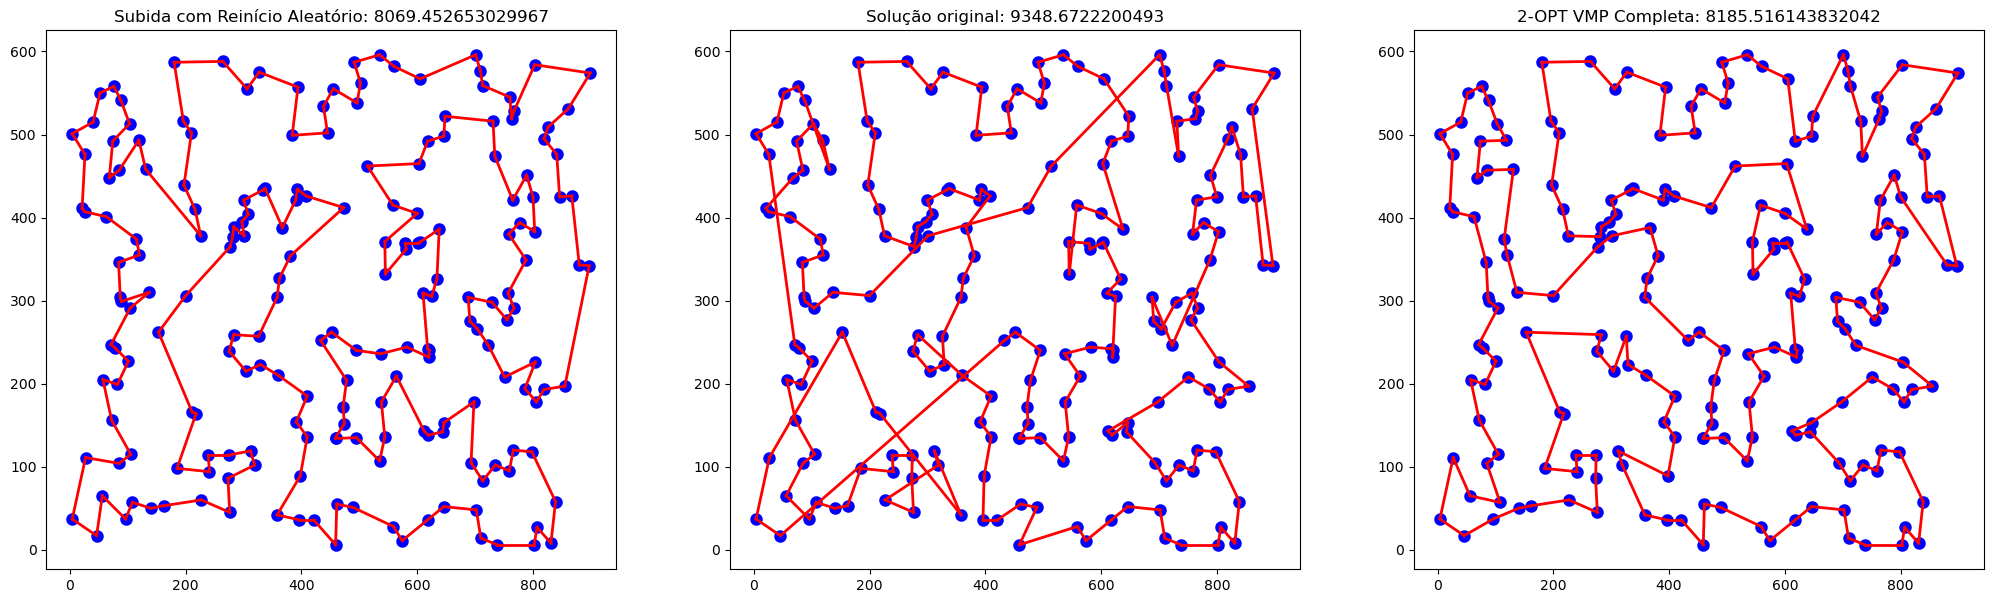

In [55]:
fig, ax = plt.subplots(1, 3, squeeze=True)
fig.set_size_inches(25, 7)
for axis, route, titulo in zip(
    ax,
    [melhor, rota_vmp_completa, solucao_inicial],
    ["Subida com Reinício Aleatório", "Solução original", "2-OPT VMP Completa"],
):
    plt.sca(axis)
    plt.title(titulo + f": {tamanho_rota(route)}")
    plot_rota(route, completa=False)


O resultado é variável, mas com algumas iterações pode trazer uma melhora perceptível (1%) sobre o 2-OTP. A seguir, vamos fazer mais alguns experimentos. Vamos variar a quantidade de iterações de reinícios aleatórios e de passos de intensificação, além do fator de "embaralhamento" que é a proporção de segmentos trocados pela função `sortear_solucao`. Para evitar um tensor $3\times3\times3$ de figuras, vamos variar todos os parâmetros simultaneamente. Ainda será bastante ilustrativo fazer isso, mesmo abrindo mão das alterações independentes. Além disso, vamos tomar uma solução inicial pior, uma VMP completa sem aplicação do 2-OPT.

In [56]:
resultados = []
lista_parametros = [
    {"reinicio": x, "subida": y, "fator_embaralhamento": z}
    for x, y, z in zip(
        range(0, 121, 15), range(10, 91, 10), linspace(0.01, 0.5, 9)
    )
]

def gerar_sortear_solucao(fator_embaralhamento):
    def fn(solucao_inicial):
        return sortear_solucao(solucao_inicial, distancia_maxima_proporcional=fator_embaralhamento)
    return fn

solucao_inicial = vmp_completa(cidades)

for parametros in lista_parametros:
    rng = default_rng(2023)
    resultados.append(
        subida_na_colina_com_reinicio_aleatorio(
            solucao_inicial,
            validar_solucao,
            avaliar_solucao,
            modificar_solucao,
            gerar_sortear_solucao(parametros['fator_embaralhamento']),
            max_iteracoes_subida=parametros['subida'],
            max_iteracoes_reinicio=parametros['reinicio']
        )
    )

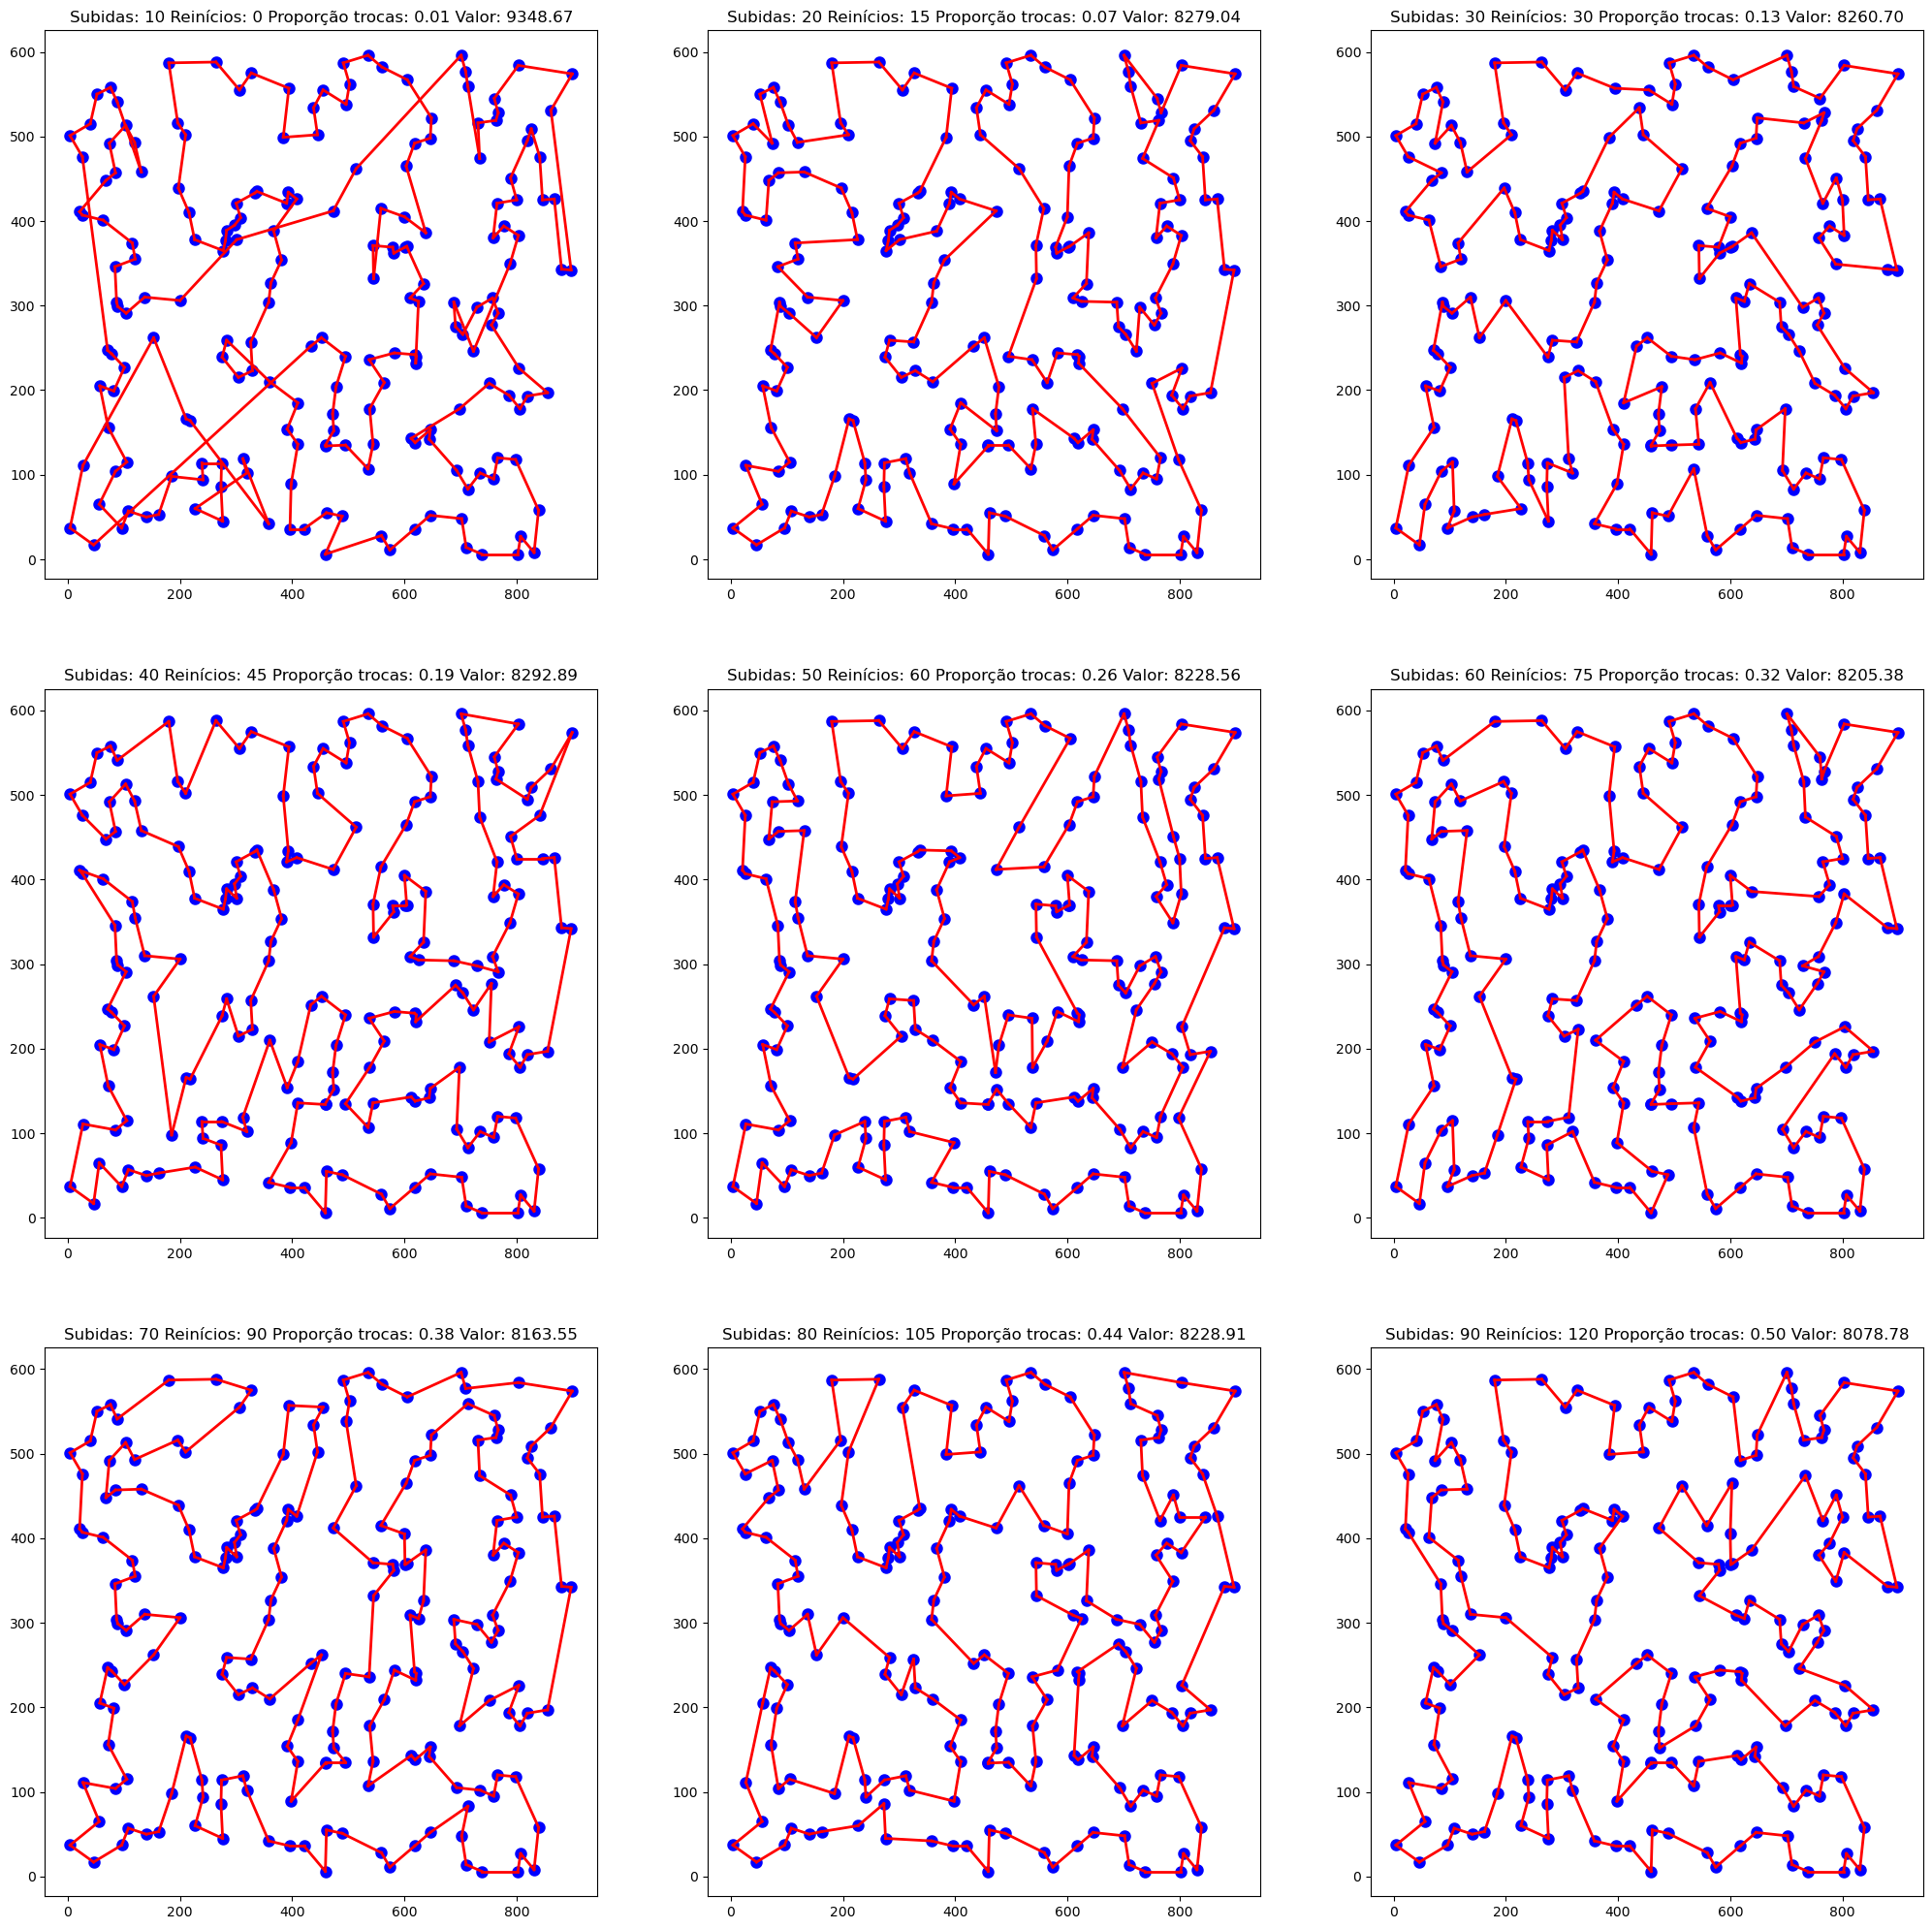

In [57]:
fig, ax = plt.subplots(3, 3)
fig.set_size_inches(25, 25)
for axis, resultado, iteracoes in zip(ax.flatten(), resultados, lista_parametros):
    plt.style.use('dark_background')
    plt.sca(axis)
    plt.title(f'Subidas: {iteracoes["subida"]} Reinícios: {iteracoes["reinicio"]} Proporção trocas: {iteracoes["fator_embaralhamento"]:.2f} Valor: {tamanho_rota(resultado):.2f}')
    plot_rota(resultado, completa=False)

#### Conclusões

A mera aplicação do 2-OPT é bem melhor do que as rotinas gulosas. E como ela não é uma rotina muito custosa, é bem apropriada para aplicação em uma busca aleatória. Para motivar um processo de intensificação razoável, precisamos buscar rotinas mais globais e complexas que o 2-OPT. Utilizamos o 3-OPT de forma amostral neste exercício, mas um trabalho mais aplicado deveria buscar alguma rotina ainda mais global como 4-OPT ou maior. O resultado da aplicação do 3-OPT amostral sobre o resultado do 2-OPT foi modesto. Muitas vezes a exploração aleatória não consegue melhorar a solução inicial do 2-OPT e a rotina demanda iterações repetidas e ajuste de parâmetros. Grande cuidado é necessário com o registro dos números aleatórios para a preservação dos resultados.